In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
X_train = []
Y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])

x_train = np.array(X_train)
y_train = np.array(Y_train)

print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [7]:
#import for model 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,))
regressor.add(Dropout(0.2))
              
regressor.add(Dense(units=1))

2023-09-30 16:08:05.137841: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-09-30 16:08:05.137862: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-30 16:08:05.137867: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-30 16:08:05.137927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-30 16:08:05.137961: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=60, batch_size=32)

Epoch 1/60


2023-09-30 16:08:09.037137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:09.500243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:10.689008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:11.421567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:12.103204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:14.419428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:08:16.237660: I tensorflow/core/grappler/optimizers/cust

38/38 [==============================] - 17s 109ms/step - loss: 0.0494
Epoch 2/60
38/38 [==============================] - 1s 29ms/step - loss: 0.0056
Epoch 3/60
38/38 [==============================] - 1s 29ms/step - loss: 0.0030
Epoch 4/60
38/38 [==============================] - 1s 28ms/step - loss: 0.0032
Epoch 5/60
38/38 [==============================] - 1s 30ms/step - loss: 0.0023
Epoch 6/60
38/38 [==============================] - 1s 30ms/step - loss: 0.0021
Epoch 7/60
38/38 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 8/60
38/38 [==============================] - 1s 27ms/step - loss: 0.0019
Epoch 9/60
38/38 [==============================] - 1s 30ms/step - loss: 0.0019
Epoch 10/60
38/38 [==============================] - 1s 30ms/step - loss: 0.0019
Epoch 11/60
38/38 [==============================] - 1s 29ms/step - loss: 0.0019
Epoch 12/60
38/38 [==============================] - 1s 29ms/step - loss: 0.0029
Epoch 13/60
38/38 [===========================

In [10]:
dataset_test= pd.read_csv("Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values


In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range (60,80):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2023-09-30 16:09:30.720678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:09:30.879291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:09:31.281647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:09:31.804808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-30 16:09:32.328630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


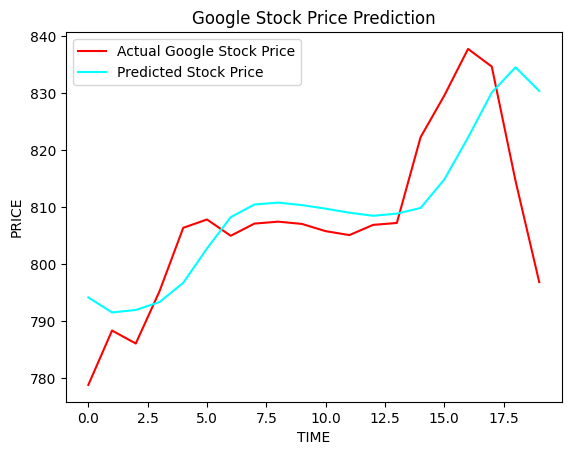

In [13]:
plt.plot(actual_stock_price, color = 'red', label = "Actual Google Stock Price")
plt.plot(predicted_stock_price, color = 'cyan', label = "Predicted Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel("TIME")
plt.ylabel('PRICE')
plt.legend()